In [14]:
import myfitnesspal
import datetime
import pandas as pd
import collections
from typing import Dict, List

In [23]:
client = myfitnesspal.Client('bradtferguson', password='Iluvet@k4ev')

In [4]:
day = client.get_date(2021, 9, 9)


In [5]:
day

<09/09/21 {'calories': 2178.0, 'carbohydrates': 277.0, 'fat': 54.0, 'protein': 167.0, 'sodium': 2404.0, 'sugar': 135.0}>

In [6]:
day.exercises[1].get_as_list()

[]

In [7]:
day.exercises[1].get_as_list()[0]['nutrition_information']

IndexError: list index out of range

In [ ]:
day.totals

In [ ]:
Jan2021 = datetime.date(2021, 1, 1)

# Rolling 7-day average of weight

In [39]:
client = myfitnesspal.Client('bradtferguson', password='Iluvet@k4ev')

In [40]:
start_date = datetime.date(2021, 1, 1)

In [44]:
measurement='Weight'
start_year = 2021
start_month=1
start_day=1
start_date = datetime.date(start_year, start_month, start_day)
measure_dict = client.get_measurements(measurement, start_date)
measurements = []
for key, value in measure_dict.items():
    measurement = pd.DataFrame({
        'date': [key],
        'measurement': [value]
    })
    measurements.append(measurement)
df = pd.concat(measurements)
df = df.sort_values(by='date', ascending=True)
df['MA'] = df.iloc[:,1].rolling(window=7).mean()
df = df.sort_values(by='date', ascending=False)
#df = df.drop(['measurement'], axis=1)
#df = df.rename(columns={'MA': f'MA_{measurement}'})

In [46]:
df = df.sort_values(by='date', ascending=False)


In [49]:
test = df.rename(columns={'MA': f'MA_{measurement}'})

In [52]:
measurement

,date,measurement
0,2021-01-01,168.9


In [51]:
f'MA_{measurement}'

'MA_         date  measurement\n0  2021-01-01        168.9'

In [54]:
def get_measurements(measurement: str='Weight', start_year:int=2021, start_month:int=1, start_day:int=1):
    start_date = datetime.date(start_year, start_month, start_day)
    measure_dict = client.get_measurements(measurement, start_date)
    measurements = []
    for key, value in measure_dict.items():
        temp = pd.DataFrame({
            'date': [key],
            'measurement': [value]
        })
        measurements.append(temp)
    df = pd.concat(measurements)
    df = df.sort_values(by='date', ascending=True)
    df['MA'] = df.iloc[:,1].rolling(window=7).mean()
    df = df.sort_values(by='date', ascending=False)
    df = df.drop(['measurement'], axis=1)
    df = df.rename(columns={'MA': f'MA_{measurement}'})
    
    return df

In [55]:
weight = get_measurements()
bodyfat = get_measurements('Body Fat %')

In [57]:
bodyfat.head()

,date,MA_Body Fat %
0,2021-09-12,17.800000
0,2021-09-11,17.728571
0,2021-09-10,17.900000
0,2021-09-09,17.942857
0,2021-09-08,18.042857


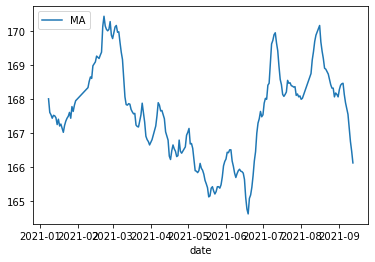

In [19]:
weight.plot(x='date', y='MA')

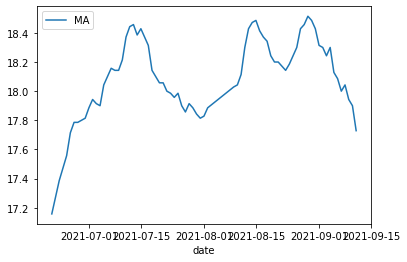

In [12]:
bodyfat.plot(x='date', y='MA')

In [13]:
# Rolling average of calories and macros

In [16]:
import csv, sys, os
from datetime import datetime

# Get account info
client = myfitnesspal.Client('bradtferguson', password='Iluvet@k4ev')# Set start year
startYear = "2021"
# Get limits
beginningDate = datetime.strptime(startYear, "%Y").date()
beginningYear = beginningDate.year
daysInMonth = {1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}
emptyNutrition = [None, None, None, None, None, None]

In [1]:
print("")
print("################################################")
print("# Scraping MyFitnessPal                        #")
print("# Make sure your account is set to public      #")
print("# and your username and pass are in keychain   #")
print("################################################")
print("")

today = datetime.now().date()
currentYear = today.year

print("")
print("################################################")
print("# Get nutrition and weight information         #")
print("################################################")
print("")


################################################
# Scraping MyFitnessPal                        #
# Make sure your account is set to public      #
# and your username and pass are in keychain   #
################################################



NameError: name 'datetime' is not defined

In [19]:
for yearIndex in range(beginningYear, currentYear+1):
    
    # Create a file name based on this year's data
    thisFileName = "healthData_%s.csv" % yearIndex

    # Open CSV as read and write.
    # If file exists, open for read / write
    #   else, create file, write only.
    try:
        f = open(thisFileName, "r+")        # Check to see if file is complete,
        row_count = sum(1 for row in f)     # else, overwrite the file
        if(row_count != 366):               # A year of rows plus headers, and an empty line at end.
            f = open(thisFileName, "w+")
            row_count = 0
    except EnvironmentError:
        f = open(thisFileName, "w+")        # If file does not exist, create it.
        row_count = 0
    
    writer = csv.writer(f)
    
    # Check number of lines. If the year wasn't captured, start over.
    if(row_count < 365):
        # Write headers for totals
        writer.writerow(["Date","Calories", "Carbohydrates", "Fat", "Protein", "Sodium", "Sugar", "Weight", "Body Fat %"])
        sys.stdout.write(str(yearIndex)+": ")   # Print has a linefeed.
        sys.stdout.flush()
        for monthIndex in range(1, 12+1):
                
            beginningOfMonthStr = "%s-%s-%s" % (yearIndex, monthIndex, 1)
            endOfMonthStr = "%s-%s-%s" % (yearIndex, monthIndex, daysInMonth[monthIndex])

            beginningOfMonth = datetime.strptime(beginningOfMonthStr, "%Y-%m-%d").date()
            endOfMonth = datetime.strptime(endOfMonthStr, "%Y-%m-%d").date()
            
            thisMonthsWeights = dict(client.get_measurements('Weight', beginningOfMonth, endOfMonth))
            thisMonthsBodyfats = dict(client.get_measurements('Body Fat %', beginningOfMonth, endOfMonth))


            for dayIndex in range(1, daysInMonth[monthIndex]+1):
                
                fullDateIndex = "%s-%s-%s" % (yearIndex, monthIndex, dayIndex)
                thisDate = datetime.strptime(fullDateIndex, "%Y-%m-%d").date()
                if(thisDate > today):
                    break;

                thisDaysNutritionData = client.get_date(yearIndex, monthIndex, dayIndex)
                thisDaysNutritionDataDict = thisDaysNutritionData.totals
                thisDaysNutritionValues = thisDaysNutritionDataDict.values()

                thisDaysWeight = [(thisMonthsWeights.get(thisDate))]
                thisDaysBodyfat = [(thisMonthsBodyfats.get(thisDate))]
                
                if(len(thisDaysNutritionValues) < 6):
                    thisDaysNutritionValues = emptyNutrition
                print(fullDateIndex)

                dataRow = [fullDateIndex] + list(thisDaysNutritionValues) + thisDaysWeight + thisDaysBodyfat
                if dataRow:
                    writer.writerow(dataRow)

            sys.stdout.write("#")
            sys.stdout.flush()
        print(" -- Done.")
        f.close()
    else:
        print((str(yearIndex)+": Exists and is complete."))

2021: 2021-1-1
2021-1-2
2021-1-3
2021-1-4
2021-1-5
2021-1-6
2021-1-7
2021-1-8
2021-1-9
2021-1-10
2021-1-11
2021-1-12
2021-1-13
2021-1-14
2021-1-15
2021-1-16
2021-1-17
2021-1-18
2021-1-19
2021-1-20
2021-1-21
2021-1-22
2021-1-23
2021-1-24
2021-1-25
2021-1-26
2021-1-27
2021-1-28
2021-1-29
2021-1-30
2021-1-31
#2021-2-1
2021-2-2
2021-2-3
2021-2-4
2021-2-5
2021-2-6
2021-2-7
2021-2-8
2021-2-9
2021-2-10
2021-2-11
2021-2-12
2021-2-13
2021-2-14
2021-2-15
2021-2-16
2021-2-17
2021-2-18
2021-2-19
2021-2-20
2021-2-21
2021-2-22
2021-2-23
2021-2-24
2021-2-25
2021-2-26
2021-2-27
2021-2-28
#2021-3-1
2021-3-2
2021-3-3
2021-3-4
2021-3-5
2021-3-6
2021-3-7
2021-3-8
2021-3-9
2021-3-10
2021-3-11
2021-3-12
2021-3-13
2021-3-14
2021-3-15
2021-3-16
2021-3-17
2021-3-18
2021-3-19
2021-3-20
2021-3-21
2021-3-22
2021-3-23
2021-3-24
2021-3-25
2021-3-26
2021-3-27
2021-3-28
2021-3-29
2021-3-30
2021-3-31
#2021-4-1
2021-4-2
2021-4-3
2021-4-4
2021-4-5
2021-4-6
2021-4-7
2021-4-8
2021-4-9
2021-4-10
2021-4-11
2021-4-12
2021-4-

In [251]:
# Analyze the data

In [117]:
data = pd.read_csv('healthData_2021.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data = data.dropna().reset_index(drop=True)
data['Macro_calories'] = data['Carbohydrates']*4 + data['Protein']*4 + data['Fat']*9
for col in data.columns[1:]:
    data[f'{col}_MA'] = data.loc[:,col].rolling(window=7, min_periods=1).mean()
data = data.sort_values(by='Date', ascending=False)
data.to_csv('healthData_2021.csv')

